In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    
    def __init__(self, train_data):
        self.train_data = train_data
        self.weight = [random.uniform(-1, 1) for i in range(train_data.shape[1]-1)] # 초기 weight 설정
        self.bias = random.uniform(-1, 1) # 초기 bias 설정
        self.learning_rate = 0.1 # 초기 learning_rate 설정
        self.errors = [] # 각 시행에서의 정확도(몇개 맞추었는가)
        self.learning_process = []  # learning process 변화 저장
        
    def calculate_sum(self, input_data):
        calculated_sum = sum([self.weight[i] * input_data[i] for i in range(len(input_data))]) + self.bias
        return 1 if calculated_sum >= 0 else 0
    
    def train(self, iteration_max=1000): # 최대 반복횟수: 1000회
        for iter in range(iteration_max):
            wrong_cnt = 0 # 예측 틀린 횟수 담을 변수
            for i in range(self.train_data.shape[0]):
                input_data = self.train_data[i, :-1] # 입력값
                target_data = self.train_data[i, -1] # 나와야 되는 값
                pred = self.calculate_sum(input_data) # 현재 가중치,bias값으로 계산할 때 출력값
                error = target_data - pred

                for j in range(len(self.weight)):
                    self.weight[j] += error * self.learning_rate * input_data[j]
                self.bias += error * self.learning_rate # 가중치 및 bias 업데이트

                if error != 0: # error가 0이 아니면 예상이 틀렸으므로
                    wrong_cnt += 1

            self.errors.append(wrong_cnt)# 예측 틀린 횟수 저장
            self.update_learning_process(iter+1)  # learning process 업데이트

            if wrong_cnt == 0:
                print("총 {0}회 반복".format(iter + 1))
                break
                
    def test(self, test_data):
        results = []
        for i in range(test_data.shape[0]):
            result = self.calculate_sum(test_data[i]) # weight, bias값 기반으로 측정된 예측값
            results.append(result)
        return results
    
    def update_learning_process(self, iter): #learning_process 업데이트
        x = np.linspace(-0.2, 1.2, 100) # x 같은 간격으로 생성
        y = (-self.weight[0] * x - self.bias) / self.weight[1] # x1*w1 + x2*w2 +bias =0 --> x2 = (-x1*w1-bias)/w2
        self.learning_process.append((x, y, iter))# x값, y값, 반복횟수 저장

    def show_learning_process(self):

        plt.figure(figsize=(8, 8))  # 그래프 크기 
        plt.scatter(self.train_data[:, 0], self.train_data[:, 1], c=self.train_data[:, 2]) # (0,0),(1,0),(0,1),(1,1)점 표시 
        for process in self.learning_process:
            x, y, iter = process # 각 시행의 x,y,몇번째 반복인지 저장
            plt.plot(x, y, '-r', alpha=0.5, label=f'Iteration {iter}')  # 각 시행별 learning process를 표시
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.title('Learning Process')
        plt.show()
        
    def show_error(self):
        plt.plot(self.errors) # 저장되어 있는 error 배열 그래프로 그리기
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        plt.title('Errors')
        plt.show()


총 12회 반복
AND 게이트 결과: [0, 0, 0, 1]


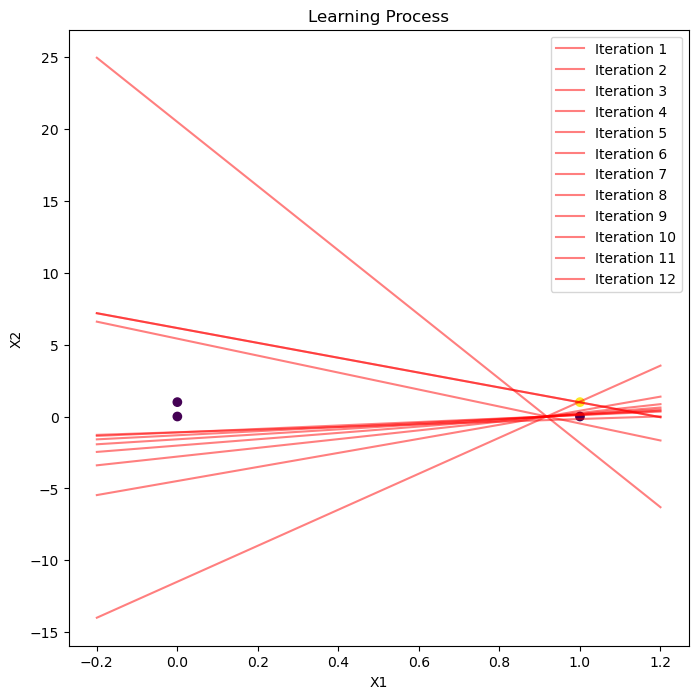

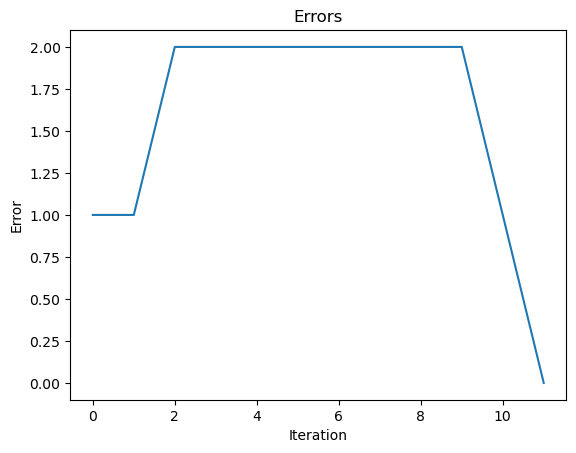

총 5회 반복
OR 게이트 결과: [0, 1, 1, 1]


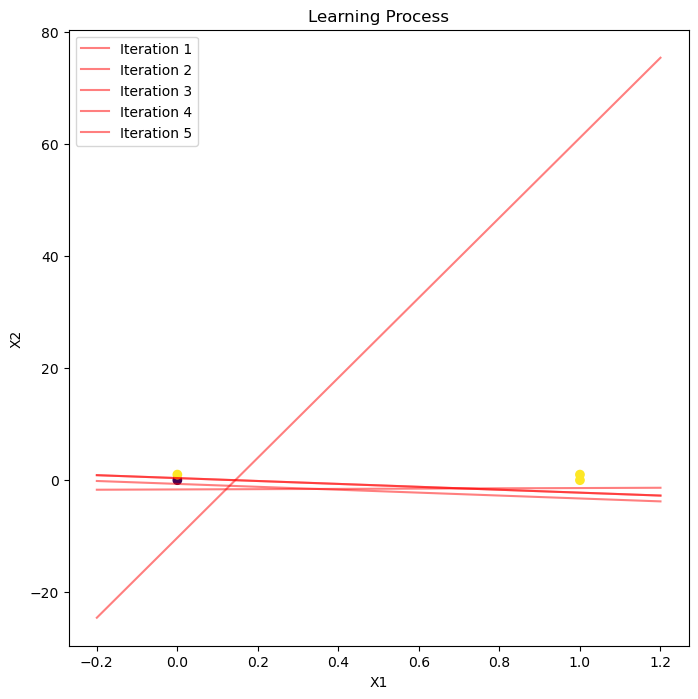

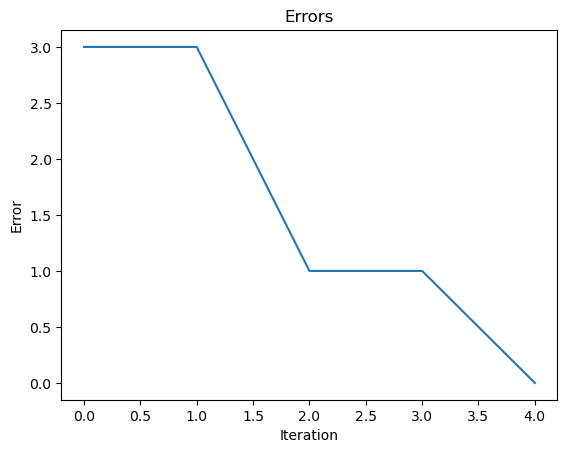

XOR 게이트 결과: [1, 1, 0, 0]


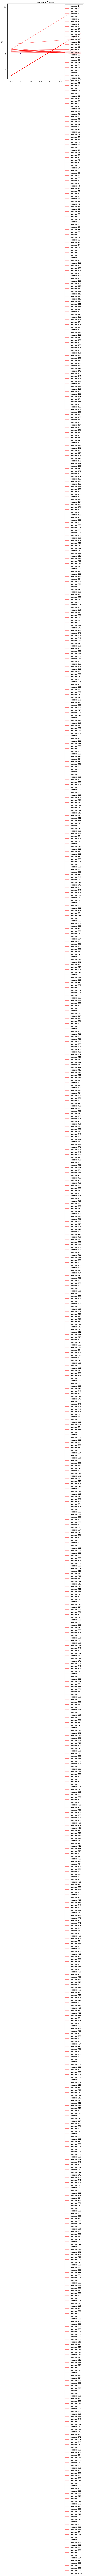

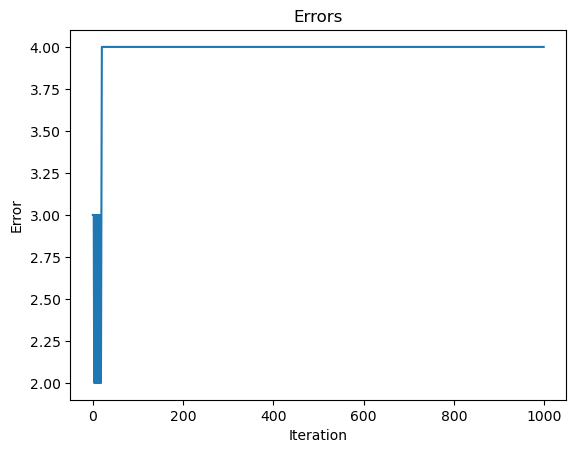

In [3]:
# AND 게이트 학습 
AND_train_data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1],
])

perceptron_and = Perceptron(AND_train_data)
perceptron_and.train()
print("AND 게이트 결과:", perceptron_and.test(AND_train_data[:, :-1]))

perceptron_and.show_learning_process()
perceptron_and.show_error()

# OR 게이트 학습 
OR_train_data = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])

perceptron_or = Perceptron(OR_train_data)
perceptron_or.train()
print("OR 게이트 결과:", perceptron_or.test(OR_train_data[:, :-1]))

perceptron_or.show_learning_process()
perceptron_or.show_error()


# XOR 게이트 학습 
XOR_train_data = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
])

perceptron_xor = Perceptron(XOR_train_data)
perceptron_xor.train()
print("XOR 게이트 결과:", perceptron_xor.test(XOR_train_data[:, :-1]))

perceptron_xor.show_learning_process()
perceptron_xor.show_error()
